In [2]:
import arviz as az
from fit_probit import build_model, get_data
from utils import get_fake_data, extract_intercept_gamma
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
bids_folder = '/data/ds-risk'
model_label = 'probit_neural6'
session = '7t2'

In [4]:
df = get_data(model_label, '7t2', bids_folder)
model = build_model(model_label, df, session, bids_folder)

100%|██████████| 30/30 [00:00<00:00, 31.28it/s]


In [5]:
idata = az.from_netcdf('/data/ds-risk/derivatives/cogmodels/model-probit_neural6_ses-7t2_trace.netcdf')

In [6]:
intercept, gamma = extract_intercept_gamma(idata, model, df, group=True)

['subject', 'x', 'n_safe', 'risky_first', 'sd', 'median_split_sd']


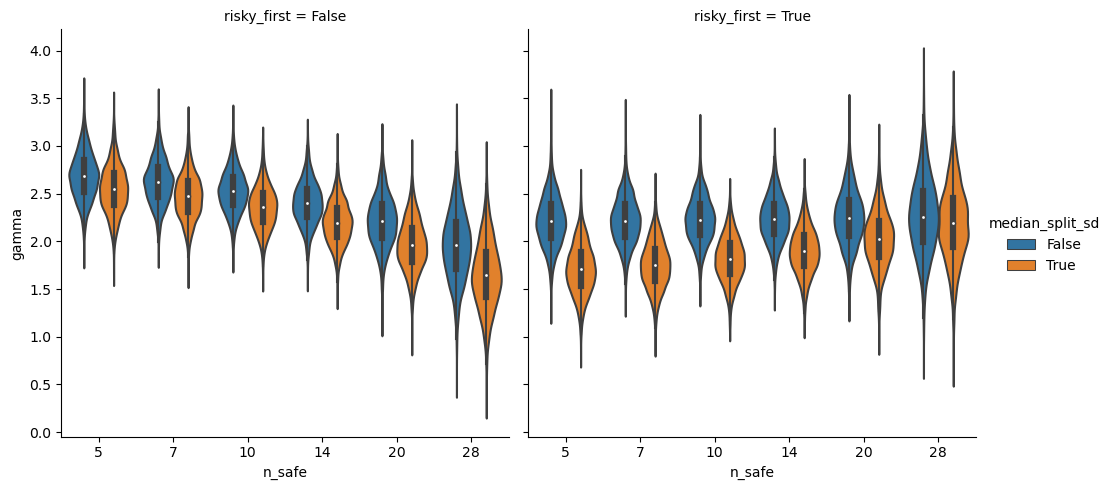

In [7]:
tmp = gamma.stack([-2, -1]).reset_index() 
tmp['n_safe'] = pd.Categorical(tmp['n_safe'].astype(int))
sns.catplot(tmp, x='n_safe', col='risky_first', hue='median_split_sd', kind='violin', y='gamma')

In [8]:
rnp = np.exp(intercept['intercept']/gamma['gamma'])

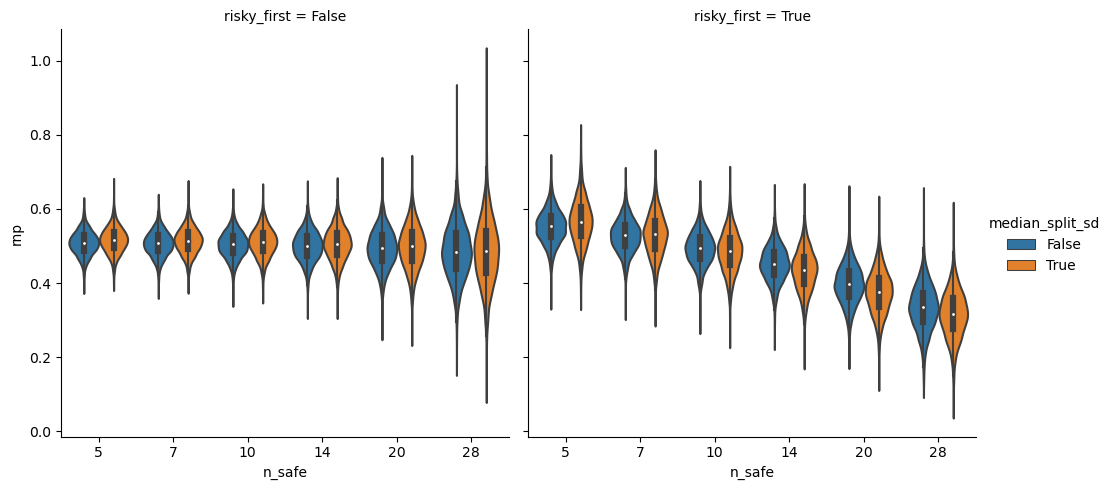

In [9]:
tmp = rnp.stack([-2, -1]).to_frame('rnp').reset_index()
tmp['n_safe'] = pd.Categorical(tmp['n_safe'].astype(int))
sns.catplot(tmp, x='n_safe', col='risky_first', hue='median_split_sd', kind='violin', y='rnp')

In [10]:
intercept, gamma = extract_intercept_gamma(idata, model, df, group=False)
rnp = np.clip(np.exp(intercept['intercept']/gamma['gamma']), 0, 1)

mean_intercept, mean_gamma = intercept.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('intercept'), gamma.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('gamma')
mean_rnp = np.clip(np.exp(mean_intercept['intercept']/mean_gamma['gamma']).to_frame('rnp'), 0, 1)

['subject', 'x', 'n_safe', 'risky_first', 'sd', 'median_split_sd']


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


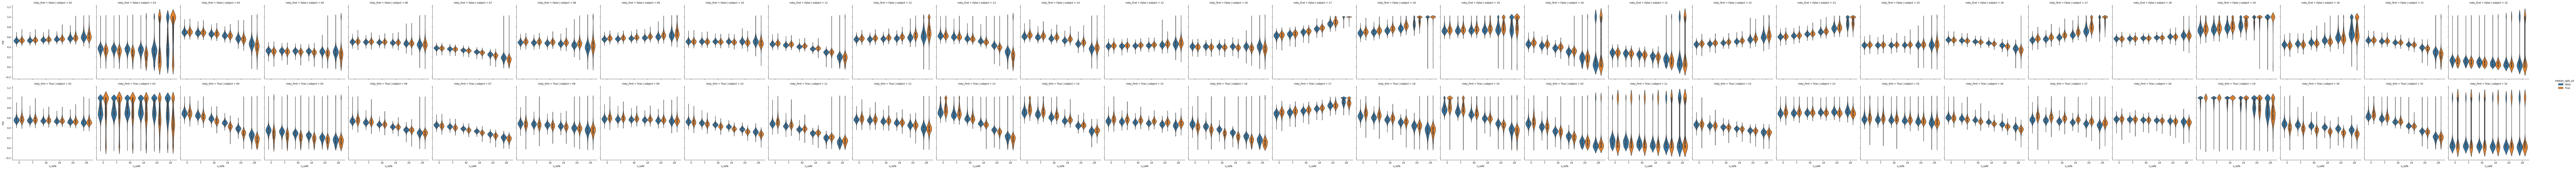

In [11]:
tmp = rnp.stack([-2, -1]).to_frame('rnp').reset_index()
tmp['n_safe'] = pd.Categorical(tmp['n_safe'].astype(int))
sns.catplot(tmp, x='n_safe', row='risky_first', hue='median_split_sd', kind='violin', y='rnp', col='subject')

In [12]:
import matplotlib.pyplot as plt

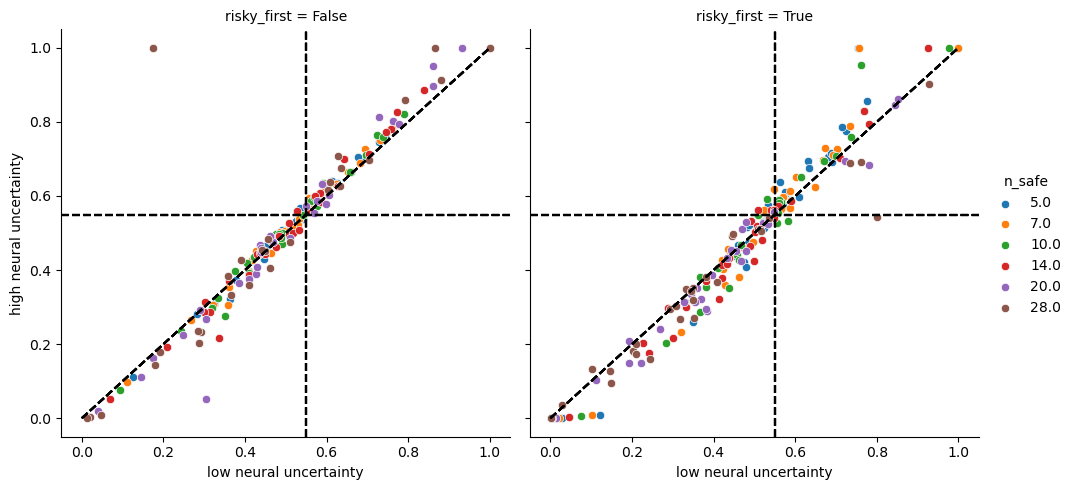

In [13]:
tmp = mean_rnp.unstack('median_split_sd')['rnp']
tmp.columns = ['low neural uncertainty', 'high neural uncertainty']

fac = sns.FacetGrid(tmp.reset_index(), col='risky_first', hue='n_safe', height=5.)
fac.map(sns.scatterplot, 'low neural uncertainty', 'high neural uncertainty')

fac.map(lambda *args, **kwargs: plt.plot([0, 1], [0, 1], c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0.55, c='k', ls='--'))

fac.add_legend()

In [14]:
mean_mean_rnp = mean_rnp.groupby(['subject', 'risky_first']).mean()

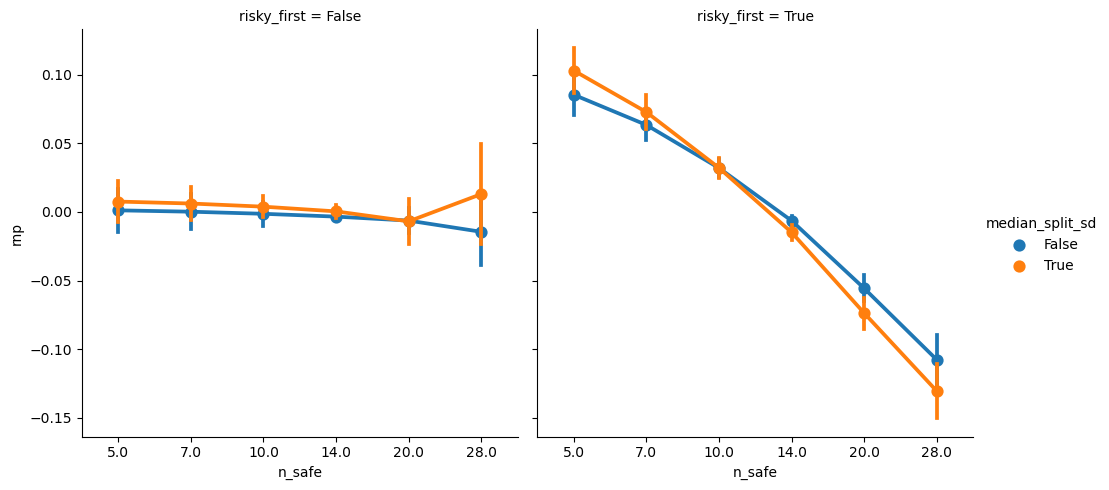

In [15]:
tmp = (mean_rnp - mean_mean_rnp)


sns.catplot(tmp.reset_index(), x='n_safe', y='rnp', hue='median_split_sd', kind='point', col='risky_first', errorbar='se')

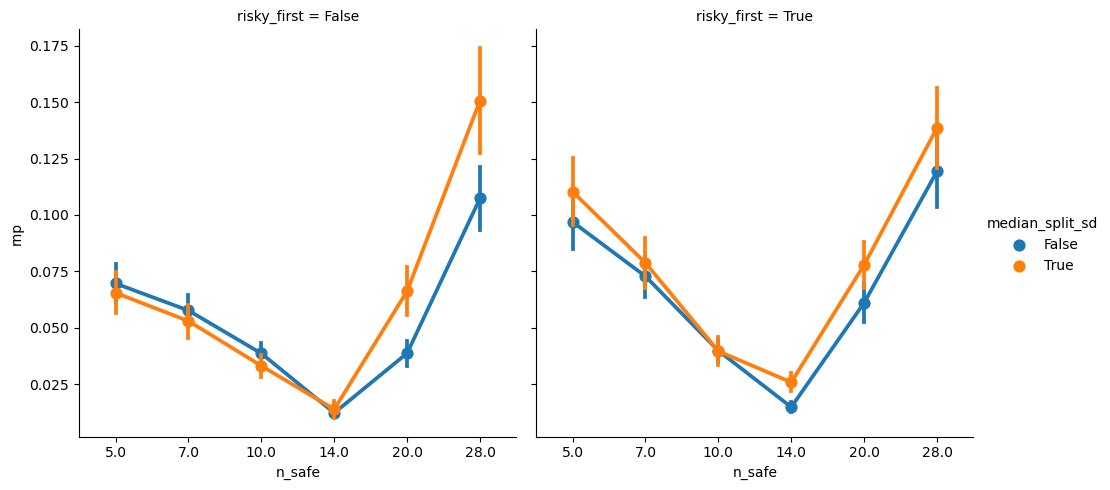

In [16]:
tmp = (mean_rnp - mean_mean_rnp).abs()


sns.catplot(tmp.reset_index(), x='n_safe', y='rnp', hue='median_split_sd', kind='point', col='risky_first', errorbar='se')

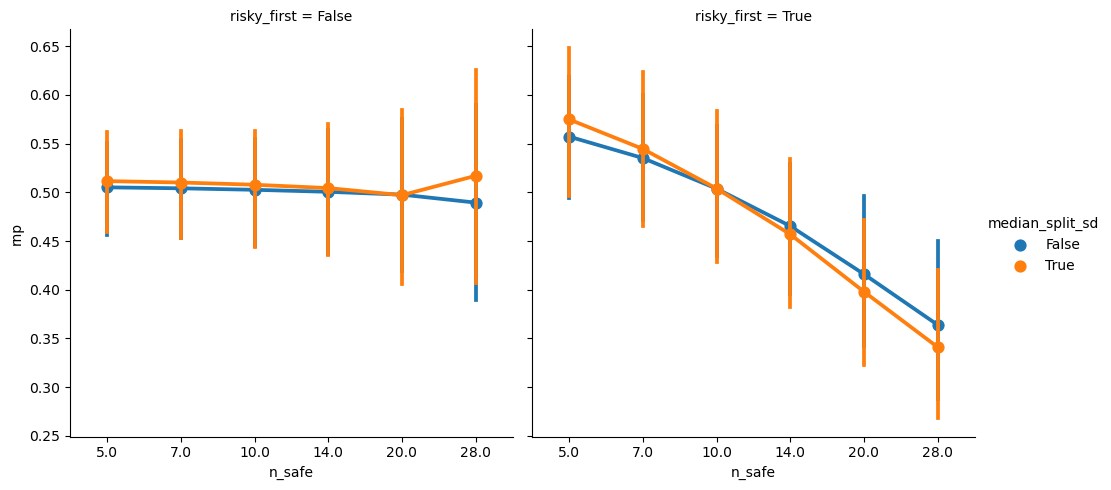

In [17]:
sns.catplot(mean_rnp.reset_index(), x='n_safe', y='rnp', hue='median_split_sd', col='risky_first', kind='point')

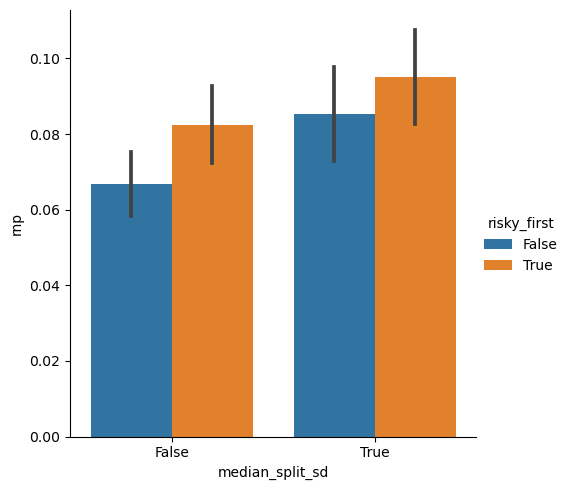

In [18]:
tmp = mean_rnp.groupby(['subject', 'median_split_sd', 'risky_first']).std()

sns.catplot(tmp.reset_index(), x='median_split_sd', hue='risky_first', y='rnp', kind='bar', errorbar='se')

In [19]:
import pingouin

In [20]:
pingouin.rm_anova(data=tmp.reset_index(), dv='rnp', within=['risky_first', 'median_split_sd'], subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,risky_first,0.004815,1,29,0.004815,1.271273,0.268771,0.268771,0.011248,1.0
1,median_split_sd,0.007240,1,29,0.007240,4.737219,0.037804,0.037804,0.016820,1.0
2,risky_first * median_split_sd,0.000270,1,29,0.000270,1.860034,0.183114,0.183114,0.000638,1.0


# Model 7

In [21]:
import arviz as az
from fit_probit import build_model, get_data
from utils import get_fake_data, extract_intercept_gamma
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 10%|█         | 3/30 [00:00<00:01, 24.62it/s]/Users/gdehol/mambaforge/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
100%|██████████| 30/30 [00:01<00:00, 27.71it/s]


['subject', 'x', 'n_safe', 'risky_first', 'sd', 'median_split_sd']


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


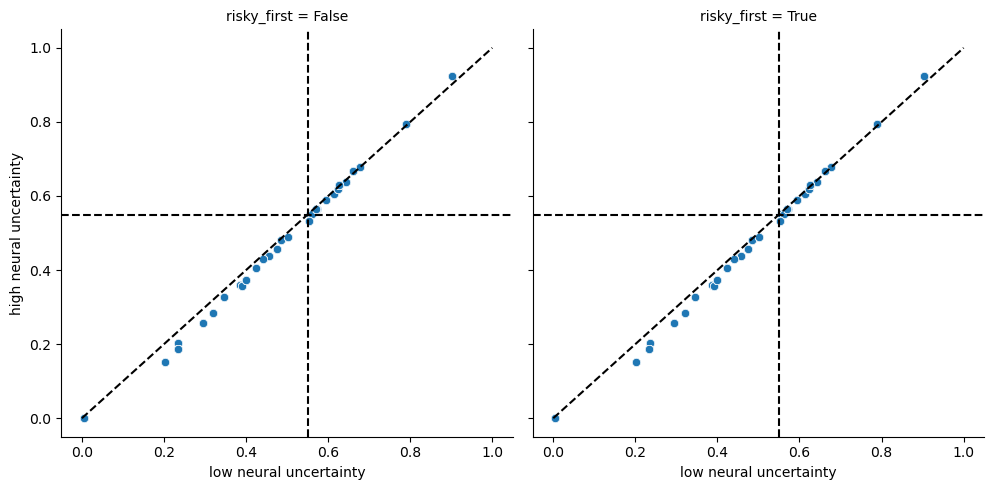

In [22]:
model_label = 'probit_neural7'
session = '3t2'

df = get_data(model_label, session, bids_folder)
model = build_model(model_label, df, session, bids_folder)


idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-probit_neural7_ses-{session}_trace.netcdf')

intercept, gamma = extract_intercept_gamma(idata, model, df, group=False)
rnp = np.clip(np.exp(intercept['intercept']/gamma['gamma']), 0, 1)

mean_intercept, mean_gamma = intercept.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('intercept'), gamma.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('gamma')
mean_rnp = np.clip(np.exp(mean_intercept['intercept']/mean_gamma['gamma']).to_frame('rnp'), 0, 1)

tmp = mean_rnp.unstack('median_split_sd')['rnp']
tmp.columns = ['low neural uncertainty', 'high neural uncertainty']

fac = sns.FacetGrid(tmp.reset_index(), col='risky_first', height=5.)
fac.map(sns.scatterplot, 'low neural uncertainty', 'high neural uncertainty')

fac.map(lambda *args, **kwargs: plt.plot([0, 1], [0, 1], c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0.55, c='k', ls='--'))

fac.add_legend()

In [23]:
intercept / gamma

gamma                  \
chain                                                    0                   
draw                                                   0   1   2   3   4     
subject n_safe risky_first sd        median_split_sd                         
02      5.0    False       19.137058 True              NaN NaN NaN NaN NaN   
                                     False             NaN NaN NaN NaN NaN   
               True        19.137058 True              NaN NaN NaN NaN NaN   
                                     False             NaN NaN NaN NaN NaN   
        7.0    False       19.137058 True              NaN NaN NaN NaN NaN   
...                                                    ...  ..  ..  ..  ..   
32      14.0   True        19.137058 False             NaN NaN NaN NaN NaN   
        28.0   False       19.137058 True              NaN NaN NaN NaN NaN   
                                     False             NaN NaN NaN NaN NaN   
               True        19.137058 True              NaN NaN NaN NaN NaN   
                                     False             NaN NaN NaN NaN NaN   

                                                                          ...  \
chain                                                                     ...   
draw                                                 5   6   7   8   9    ...   
subject n_safe risky_first sd        median_split_sd                      ...   
02      5.0    False       19.137058 True            NaN NaN NaN NaN NaN  ...   
                                     False           NaN NaN NaN NaN NaN  ...   
               True        19.137058 True            NaN NaN NaN NaN NaN  ...   
                                     False           NaN NaN NaN NaN NaN  ...   
        7.0    False       19.137058 True            NaN NaN NaN NaN NaN  ...   
...                                                   ..  ..  ..  ..  ..  ...   
32      14.0   True        19.137058 False           NaN NaN NaN NaN NaN  ...   
        28.0   False       19.137058 True            NaN NaN NaN NaN NaN  ...   
                                     False           NaN NaN NaN NaN NaN  ...   
               True        19.137058 True            NaN NaN NaN NaN NaN  ...   
                                     False           NaN NaN NaN NaN NaN  ...   

                                                     intercept              \
chain                                                        3               
draw                                                       990 991 992 993   
subject n_safe risky_first sd        median_split_sd                         
02      5.0    False       19.137058 True                  NaN NaN NaN NaN   
                                     False                 NaN NaN NaN NaN   
               True        19.137058 True                  NaN NaN NaN NaN   
                                     False                 NaN NaN NaN NaN   
        7.0    False       19.137058 True                  NaN NaN NaN NaN   
...                                                        ...  ..  ..  ..   
32      14.0   True        19.137058 False                 NaN NaN NaN NaN   
        28.0   False       19.137058 True                  NaN NaN NaN NaN   
                                     False                 NaN NaN NaN NaN   
               True        19.137058 True                  NaN NaN NaN NaN   
                                     False                 NaN NaN NaN NaN   

                                                                              
chain                                                                         
draw                                                 994 995 996 997 998 999  
subject n_safe risky_first sd        median_split_sd                          
02      5.0    False       19.137058 True            NaN NaN NaN NaN NaN NaN  
                                     False           NaN NaN NaN NaN NaN NaN  
               True  

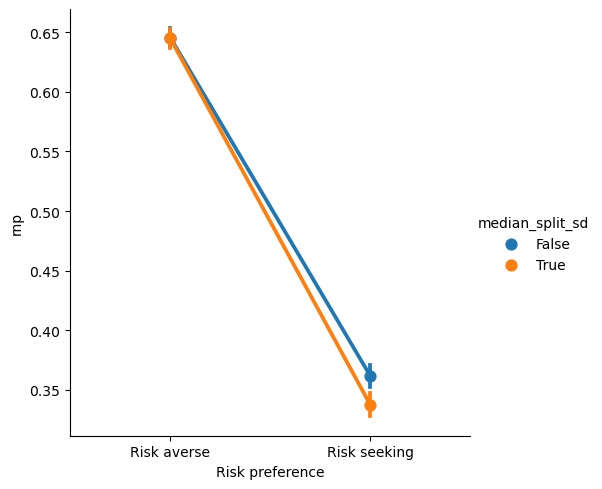

In [24]:
subjectwise_mean_rnp = mean_rnp.groupby('subject').mean()
subject_type = (subjectwise_mean_rnp['rnp'] < .55).map({False:'Risk averse', True:'Risk seeking'})
subject_type.name = 'Risk preference'

tmp = mean_rnp.join(subject_type)

sns.catplot(tmp.reset_index(), x='Risk preference', y='rnp', hue='median_split_sd', kind='point', errorbar='se')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_81624/2197249186.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(data=df.groupby(['subject', 'median_split_sd']).mean().reset_index(), x='median_split_sd', y='EV_choice', kind='point', errorbar='se')


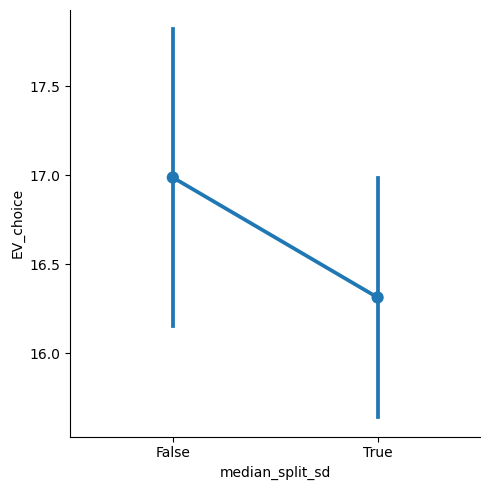

In [25]:
df.loc[df.chose_risky, 'EV_choice'] = .55 * df.loc[df.chose_risky, 'n_risky']
df.loc[~df.chose_risky, 'EV_choice'] = df.loc[df.chose_risky, 'n_safe']
sns.catplot(data=df.groupby(['subject', 'median_split_sd']).mean().reset_index(), x='median_split_sd', y='EV_choice', kind='point', errorbar='se')

100%|██████████| 30/30 [00:00<00:00, 31.05it/s]


['subject', 'x', 'n_safe', 'risky_first', 'sd', 'median_split_sd']


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


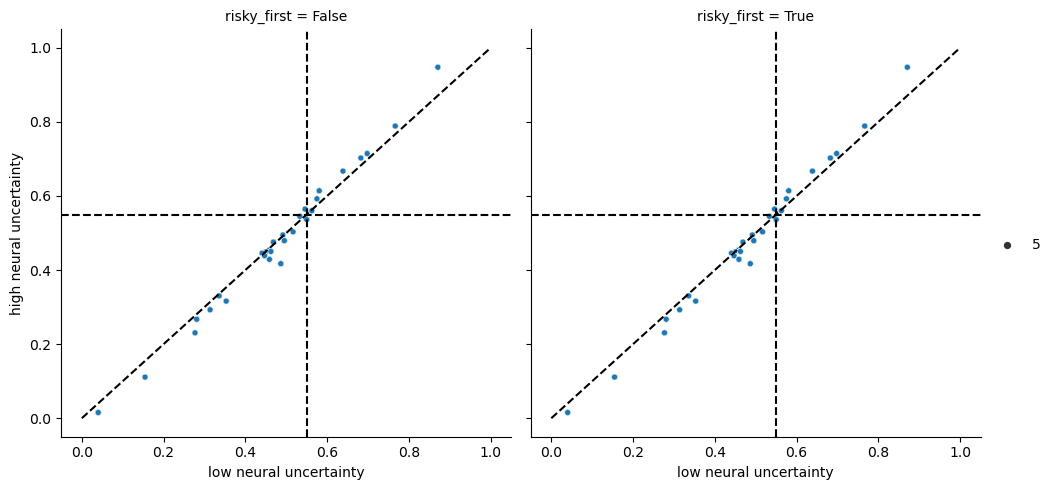

In [26]:
model_label = 'probit_neural7'
session = '7t2'
bids_folder = '/data/ds-risk'

df = get_data(model_label, session, bids_folder)
model = build_model(model_label, df, session, bids_folder)


idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-probit_neural7_ses-{session}_trace.netcdf')

intercept, gamma = extract_intercept_gamma(idata, model, df, group=False)
rnp = np.clip(np.exp(intercept['intercept']/gamma['gamma']), 0, 1)

mean_intercept, mean_gamma = intercept.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('intercept'), gamma.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('gamma')
mean_rnp = np.clip(np.exp(mean_intercept['intercept']/mean_gamma['gamma']).to_frame('rnp'), 0, 1)

tmp = mean_rnp.unstack('median_split_sd')['rnp']
tmp.columns = ['low neural uncertainty', 'high neural uncertainty']

fac = sns.FacetGrid(tmp.reset_index(), col='risky_first', height=5.)
fac.map(sns.scatterplot, 'low neural uncertainty', 'high neural uncertainty', size=5)

fac.map(lambda *args, **kwargs: plt.plot([0, 1], [0, 1], c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0.55, c='k', ls='--'))

fac.add_legend()

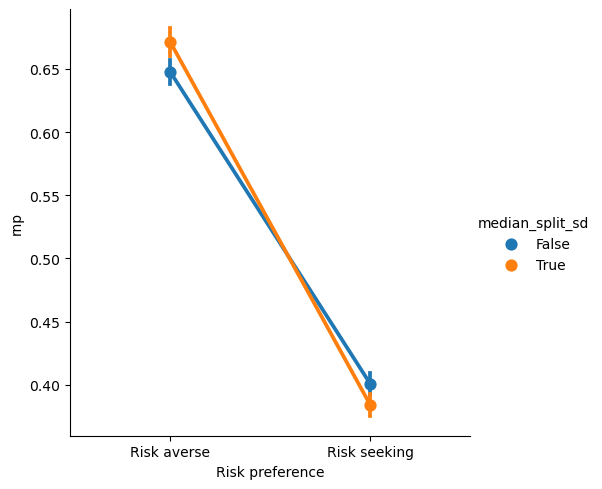

In [27]:
subjectwise_mean_rnp = mean_rnp.groupby('subject').mean()
subject_type = (subjectwise_mean_rnp['rnp'] < .55).map({False:'Risk averse', True:'Risk seeking'})
subject_type.name = 'Risk preference'

tmp = mean_rnp.join(subject_type)

sns.catplot(tmp.reset_index(), x='Risk preference', y='rnp', hue='median_split_sd', kind='point', errorbar='se')

In [28]:
df.loc[df.chose_risky, 'EV_choice'] = .55 * df.loc[df.chose_risky, 'n_risky']
df.loc[~df.chose_risky, 'EV_choice'] = df.loc[df.chose_risky, 'n_safe']

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_81624/3514677421.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(data=df.groupby(['subject', 'median_split_sd']).mean().reset_index(), x='median_split_sd', y='EV_choice', kind='point', errorbar='se')


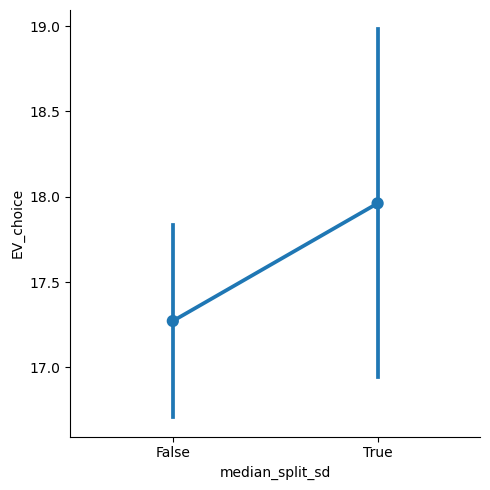

In [29]:
sns.catplot(data=df.groupby(['subject', 'median_split_sd']).mean().reset_index(), x='median_split_sd', y='EV_choice', kind='point', errorbar='se')

In [30]:
# Model 8

100%|██████████| 30/30 [00:00<00:00, 32.09it/s]


['subject', 'x', 'n_safe', 'risky_first', 'sd', 'median_split_sd']


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


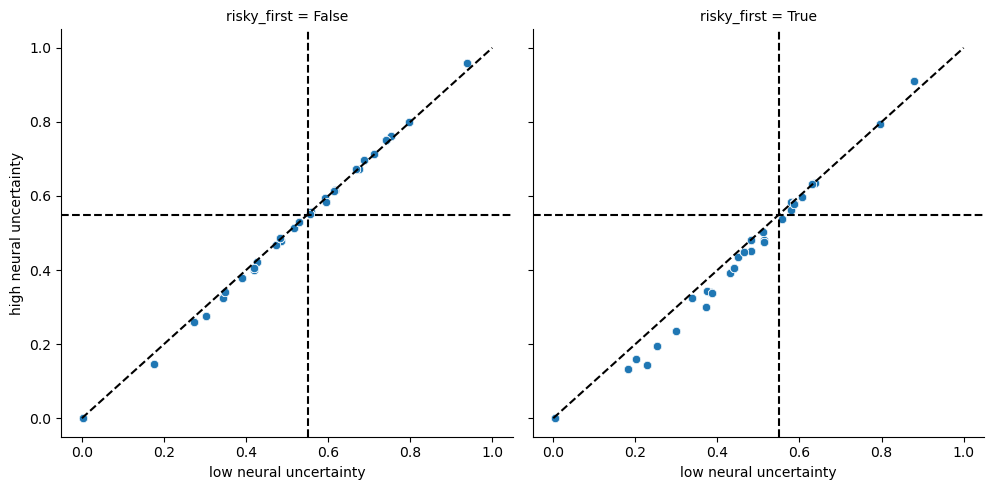

In [31]:
model_label = 'probit_neural8'
session = '3t2'

df = get_data(model_label, session, bids_folder)
model = build_model(model_label, df, session, bids_folder)


idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-probit_neural8_ses-{session}_trace.netcdf')

intercept, gamma = extract_intercept_gamma(idata, model, df, group=False)
rnp = np.clip(np.exp(intercept['intercept']/gamma['gamma']), 0, 1)

mean_intercept, mean_gamma = intercept.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('intercept'), gamma.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('gamma')
mean_rnp = np.clip(np.exp(mean_intercept['intercept']/mean_gamma['gamma']).to_frame('rnp'), 0, 1)

tmp = mean_rnp.unstack('median_split_sd')['rnp']
tmp.columns = ['low neural uncertainty', 'high neural uncertainty']

fac = sns.FacetGrid(tmp.reset_index(), col='risky_first', height=5.)
fac.map(sns.scatterplot, 'low neural uncertainty', 'high neural uncertainty')

fac.map(lambda *args, **kwargs: plt.plot([0, 1], [0, 1], c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0.55, c='k', ls='--'))

fac.add_legend()

In [32]:
mean_rnp

rnp
subject n_safe risky_first median_split_sd          
02      5.0    False       False            0.675052
                           True             0.674077
               True        False            0.556429
                           True             0.536530
        7.0    False       False            0.675052
...                                              ...
32      20.0   True        True             0.132813
        28.0   False       False            0.302920
                           True             0.275855
               True        False            0.182480
                           True             0.132813

[720 rows x 1 columns]

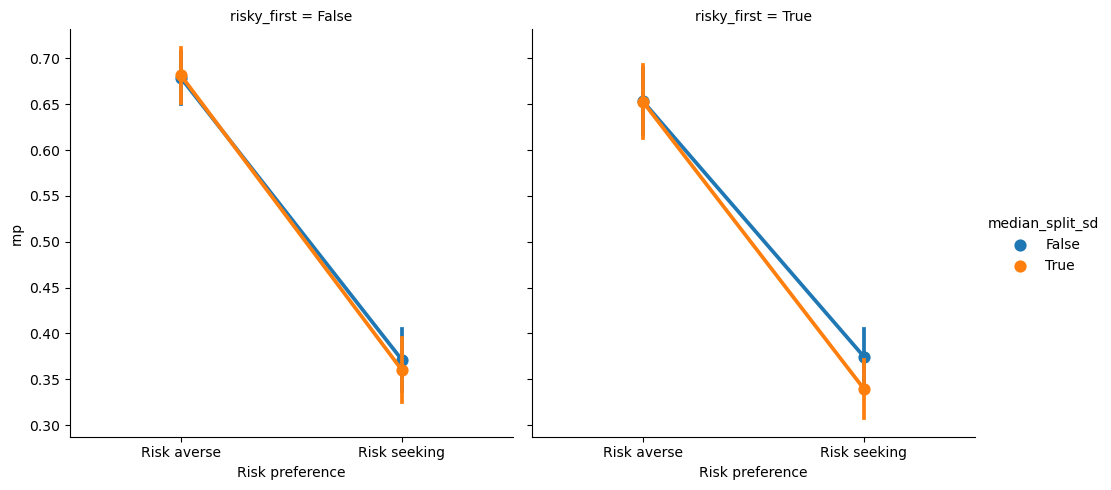

In [33]:
subjectwise_mean_rnp = mean_rnp.groupby(['subject', 'risky_first']).mean()
subject_type = (subjectwise_mean_rnp['rnp'] < .55).map({False:'Risk averse', True:'Risk seeking'})
subject_type.name = 'Risk preference'

tmp = mean_rnp.groupby(['subject', 'risky_first', 'median_split_sd']).mean().join(subject_type)

sns.catplot(tmp.reset_index(), x='Risk preference', y='rnp', col='risky_first', hue='median_split_sd', kind='point', errorbar='se')

In [34]:
pingouin.mixed_anova(tmp.xs(True, 0, 'risky_first').groupby(['subject', 'median_split_sd', 'Risk preference']).mean().reset_index(), dv='rnp', within='median_split_sd', between='Risk preference', subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Risk preference,1.105423,1,28,1.105423,30.595884,6.504910e-06,0.522151,NaN
1,median_split_sd,0.009177,1,28,0.009177,45.817983,2.374251e-07,0.620689,1.0
2,Interaction,0.003761,1,28,0.003761,18.777473,1.709474e-04,0.401421,NaN


In [35]:
pingouin.mixed_anova(tmp.xs(True, 0, 'risky_first').groupby(['subject', 'median_split_sd', 'Risk preference']).mean().reset_index(), dv='rnp', within='median_split_sd', between='Risk preference', subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Risk preference,1.105423,1,28,1.105423,30.595884,6.504910e-06,0.522151,NaN
1,median_split_sd,0.009177,1,28,0.009177,45.817983,2.374251e-07,0.620689,1.0
2,Interaction,0.003761,1,28,0.003761,18.777473,1.709474e-04,0.401421,NaN


100%|██████████| 30/30 [00:00<00:00, 32.30it/s]


['subject', 'x', 'n_safe', 'risky_first', 'sd', 'median_split_sd']


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


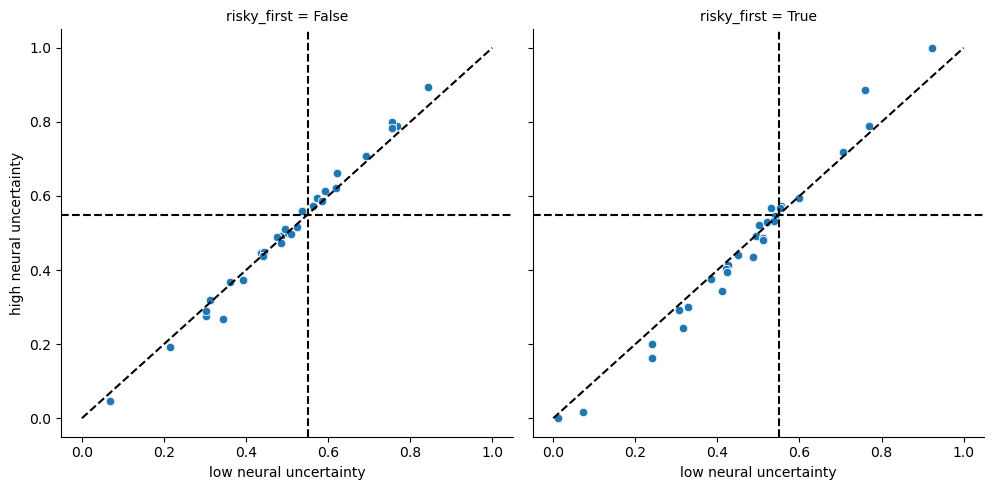

In [36]:
model_label = 'probit_neural8'
session = '7t2'

df = get_data(model_label, session, bids_folder)
model = build_model(model_label, df, session, bids_folder)


idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-probit_neural8_ses-{session}_trace.netcdf')

intercept, gamma = extract_intercept_gamma(idata, model, df, group=False)
rnp = np.clip(np.exp(intercept['intercept']/gamma['gamma']), 0, 1)

mean_intercept, mean_gamma = intercept.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('intercept'), gamma.groupby(['subject', 'n_safe', 'risky_first', 'median_split_sd']).mean().mean(1).to_frame('gamma')
mean_rnp = np.clip(np.exp(mean_intercept['intercept']/mean_gamma['gamma']).to_frame('rnp'), 0, 1)

tmp = mean_rnp.unstack('median_split_sd')['rnp']
tmp.columns = ['low neural uncertainty', 'high neural uncertainty']

fac = sns.FacetGrid(tmp.reset_index(), col='risky_first', height=5.)
fac.map(sns.scatterplot, 'low neural uncertainty', 'high neural uncertainty')

fac.map(lambda *args, **kwargs: plt.plot([0, 1], [0, 1], c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0.55, c='k', ls='--'))

fac.add_legend()

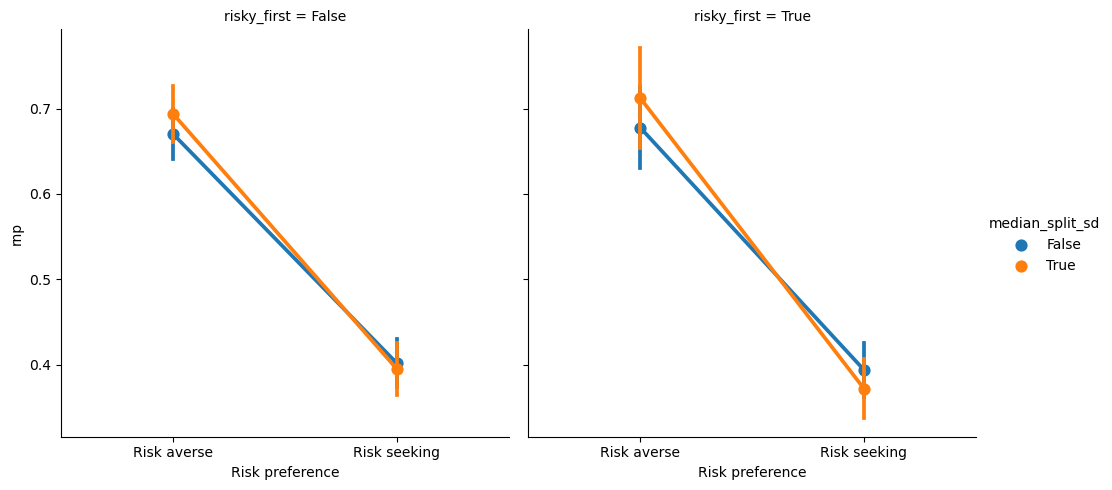

In [37]:
subjectwise_mean_rnp = mean_rnp.groupby(['subject', 'risky_first']).mean()
subject_type = (subjectwise_mean_rnp['rnp'] < .55).map({False:'Risk averse', True:'Risk seeking'})
subject_type.name = 'Risk preference'

tmp = mean_rnp.groupby(['subject', 'risky_first', 'median_split_sd']).mean().join(subject_type)

sns.catplot(tmp.reset_index(), x='Risk preference', y='rnp', col='risky_first', hue='median_split_sd', kind='point', errorbar='se')

In [38]:
import pingouin

In [39]:
pingouin.mixed_anova(tmp.xs(True, 0, 'risky_first').groupby(['subject', 'median_split_sd', 'Risk preference']).mean().reset_index(), dv='rnp', within='median_split_sd', between='Risk preference', subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Risk preference,1.142593,1,28,1.142593,24.228422,0.000034,0.463893,NaN
1,median_split_sd,0.000709,1,28,0.000709,1.242958,0.274380,0.042505,1.0
2,Interaction,0.009428,1,28,0.009428,16.521501,0.000353,0.371090,NaN


In [40]:
pingouin.mixed_anova(tmp.xs(False, 0, 'risky_first').groupby(['subject', 'median_split_sd', 'Risk preference']).mean().reset_index(), dv='rnp', within='median_split_sd', between='Risk preference', subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Risk preference,1.120691,1,28,1.120691,39.633349,8.294196e-07,0.586003,NaN
1,median_split_sd,0.000288,1,28,0.000288,1.462194,2.366932e-01,0.049629,1.0
2,Interaction,0.003195,1,28,0.003195,16.207829,3.920065e-04,0.366628,NaN


# pupil

In [41]:
import arviz as az
from fit_probit import build_model, get_data
from utils import get_fake_data, extract_intercept_gamma
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

100%|██████████| 30/30 [00:00<00:00, 30.63it/s]


['subject', 'x', 'n_safe', 'risky_first', 'median_split_pupil_baseline']


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


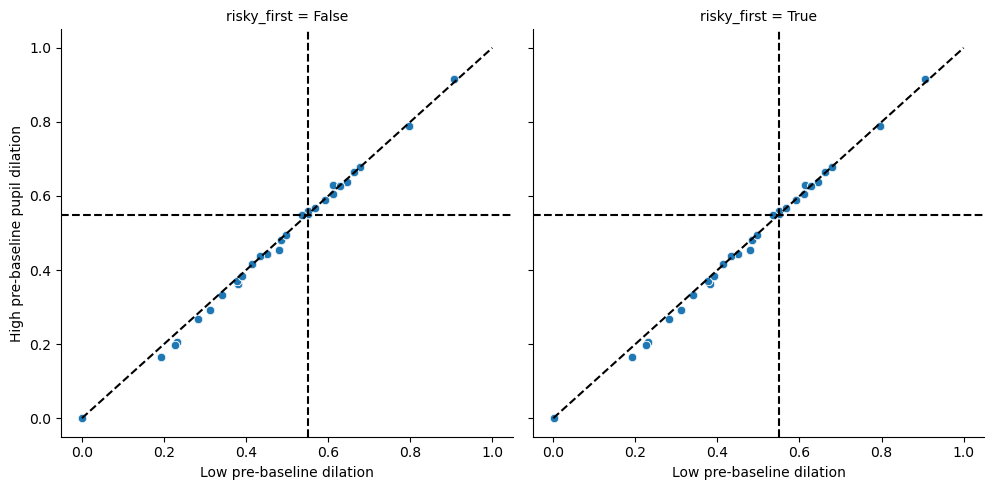

In [42]:
model_label = 'probit_pupil1'
session = '3t2'
bids_folder = '/data/ds-risk'

df = get_data(model_label, session, bids_folder)
model = build_model(model_label, df, session, bids_folder)


idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-probit_pupil1_ses-{session}_trace.netcdf')

intercept, gamma = extract_intercept_gamma(idata, model, df, group=False)
rnp = np.clip(np.exp(intercept['intercept']/gamma['gamma']), 0, 1)

mean_intercept, mean_gamma = intercept.groupby(['subject', 'n_safe', 'risky_first', 'median_split_pupil_baseline']).mean().mean(1).to_frame('intercept'), gamma.groupby(['subject', 'n_safe', 'risky_first', 'median_split_pupil_baseline']).mean().mean(1).to_frame('gamma')
mean_rnp = np.clip(np.exp(mean_intercept['intercept']/mean_gamma['gamma']).to_frame('rnp'), 0, 1)

tmp = mean_rnp.unstack('median_split_pupil_baseline')['rnp']
# tmp.columns = ['Low pupil baseline', 'High pupil baseline']

fac = sns.FacetGrid(tmp.reset_index(), col='risky_first', height=5.)
fac.map(sns.scatterplot, 'Low pre-baseline dilation', 'High pre-baseline pupil dilation')

fac.map(lambda *args, **kwargs: plt.plot([0, 1], [0, 1], c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0.55, c='k', ls='--'))

fac.add_legend()

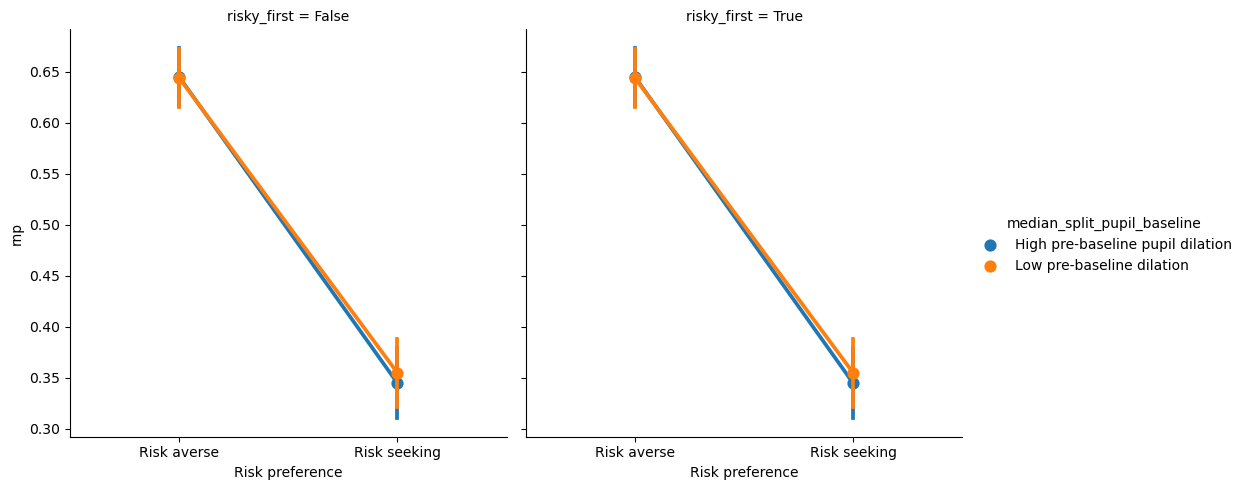

In [43]:
subjectwise_mean_rnp = mean_rnp.groupby(['subject', 'risky_first']).mean()
subject_type = (subjectwise_mean_rnp['rnp'] < .55).map({False:'Risk averse', True:'Risk seeking'})
subject_type.name = 'Risk preference'

tmp = mean_rnp.groupby(['subject', 'risky_first', 'median_split_pupil_baseline']).mean().join(subject_type)

sns.catplot(tmp.reset_index(), x='Risk preference', y='rnp', col='risky_first', hue='median_split_pupil_baseline', kind='point', errorbar='se')

100%|██████████| 30/30 [00:01<00:00, 29.24it/s]


['subject', 'x', 'n_safe', 'risky_first', 'median_split_pupil_baseline']


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


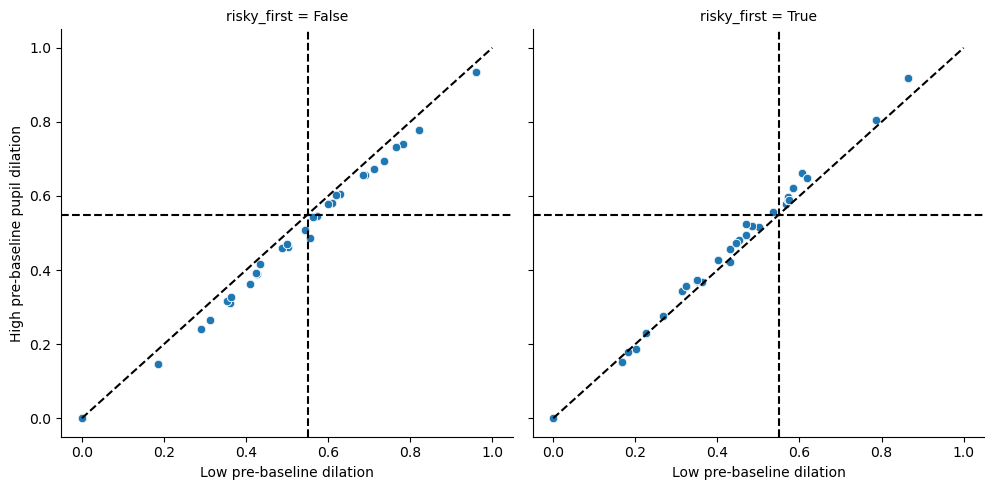

In [44]:
model_label = 'probit_pupil2'
session = '3t2'
bids_folder = '/data/ds-risk'

df = get_data(model_label, session, bids_folder)
model = build_model(model_label, df, session, bids_folder)


idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-probit_pupil2_ses-{session}_trace.netcdf')

intercept, gamma = extract_intercept_gamma(idata, model, df, group=False)
rnp = np.clip(np.exp(intercept['intercept']/gamma['gamma']), 0, 1)

mean_intercept, mean_gamma = intercept.groupby(['subject', 'n_safe', 'risky_first', 'median_split_pupil_baseline']).mean().mean(1).to_frame('intercept'), gamma.groupby(['subject', 'n_safe', 'risky_first', 'median_split_pupil_baseline']).mean().mean(1).to_frame('gamma')
mean_rnp = np.clip(np.exp(mean_intercept['intercept']/mean_gamma['gamma']).to_frame('rnp'), 0, 1)

tmp = mean_rnp.unstack('median_split_pupil_baseline')['rnp']
# tmp.columns = ['Low pupil baseline', 'High pupil baseline']

fac = sns.FacetGrid(tmp.reset_index(), col='risky_first', height=5.)
fac.map(sns.scatterplot, 'Low pre-baseline dilation', 'High pre-baseline pupil dilation')

fac.map(lambda *args, **kwargs: plt.plot([0, 1], [0, 1], c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0.55, c='k', ls='--'))

fac.add_legend()

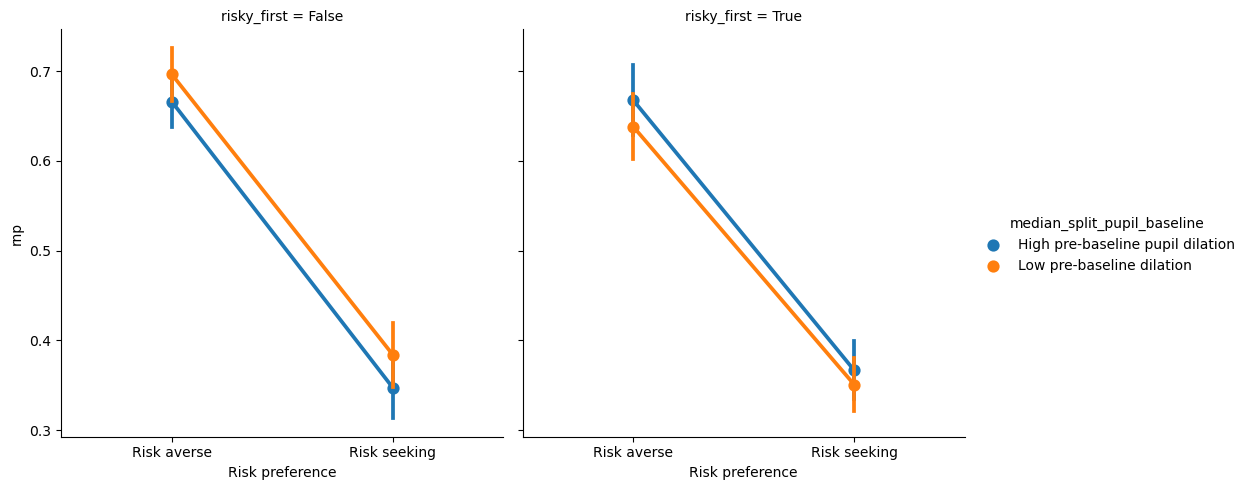

In [ ]:
subjectwise_mean_rnp = mean_rnp.groupby(['subject', 'risky_first']).mean()
subject_type = (subjectwise_mean_rnp['rnp'] < .55).map({False:'Risk averse', True:'Risk seeking'})
subject_type.name = 'Risk preference'

tmp = mean_rnp.groupby(['subject', 'risky_first', 'median_split_pupil_baseline']).mean().join(subject_type)

sns.catplot(tmp.reset_index(), x='Risk preference', y='rnp', col='risky_first', hue='median_split_pupil_baseline', kind='point', errorbar='se')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_81624/1646144048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(idata.posterior['risky_first:median_split_pupil_baseline'])


<xarray.DataArray 'risky_first:median_split_pupil_baseline' ()>
array(0.915)

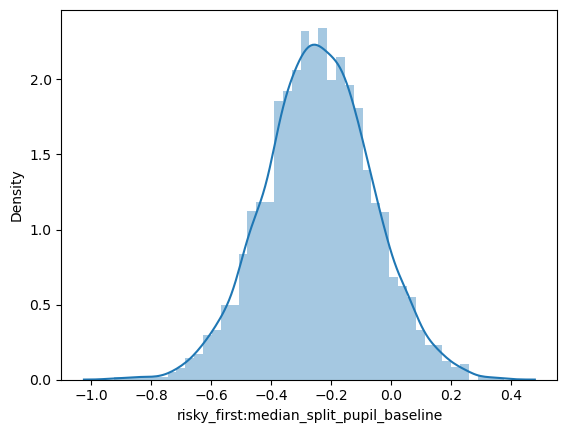

In [51]:
sns.distplot(idata.posterior['risky_first:median_split_pupil_baseline'])

(idata.posterior['risky_first:median_split_pupil_baseline'] < 0.0).mean()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_81624/1754027242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(idata.posterior['median_split_pupil_baseline'].to_dataframe())


<xarray.DataArray 'median_split_pupil_baseline' ()>
array(0.1775)

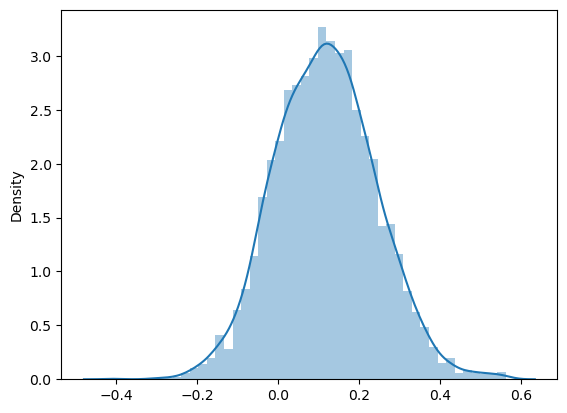

In [52]:
sns.distplot(idata.posterior['median_split_pupil_baseline'].to_dataframe())

(idata.posterior['median_split_pupil_baseline'] < 0.0).mean()

In [7]:
import pingouin

In [12]:
pingouin.mixed_anova(tmp.xs(True, 0, 'risky_first').groupby(['subject', 'median_split_pupil_baseline', 'Risk preference']).mean().reset_index(), dv='rnp', within='median_split_pupil_baseline', between='Risk preference', subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Risk preference,1.089567,1,28,1.089567,30.226182,0.000007,0.519117,NaN
1,median_split_pupil_baseline,0.005995,1,28,0.005995,37.423093,0.000001,0.572017,1.0
2,Interaction,0.000578,1,28,0.000578,3.605965,0.067922,0.114091,NaN


In [13]:
pingouin.mixed_anova(tmp.xs(False, 0, 'risky_first').groupby(['subject', 'median_split_pupil_baseline', 'Risk preference']).mean().reset_index(), dv='rnp', within='median_split_pupil_baseline', between='Risk preference', subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Risk preference,1.485584,1,28,1.485584,47.099406,1.857181e-07,0.627161,NaN
1,median_split_pupil_baseline,0.017117,1,28,0.017117,221.416457,7.976083e-15,0.887738,1.0
2,Interaction,0.000148,1,28,0.000148,1.910808,1.778016e-01,0.063884,NaN


In [53]:
idata = az.from_netcdf('/data/ds-risk/derivatives/cogmodels/model-probit_pupil3_ses-3t2_trace.netcdf')

In [54]:
idata.posterior

<xarray.Dataset>
Dimensions:                            (chain: 4, draw: 1000,
                                        subject__factor_dim: 30)
Coordinates:
  * chain                              (chain) int64 0 1 2 3
  * draw                               (draw) int64 0 1 2 3 ... 996 997 998 999
  * subject__factor_dim                (subject__factor_dim) object '02' ... ...
Data variables: (12/24)
    Intercept                          (chain, draw) float64 ...
    x                                  (chain, draw) float64 ...
    risky_first                        (chain, draw) float64 ...
    x:risky_first                      (chain, draw) float64 ...
    pupil                              (chain, draw) float64 ...
    x:pupil                            (chain, draw) float64 ...
    ...                                 ...
    risky_first|subject                (chain, draw, subject__factor_dim) float64 ...
    x:risky_first|subject              (chain, draw, subject__factor_dim) float64 ...
    pupil|subject                      (chain, draw, subject__factor_dim) float64 ...
    x:pupil|subject                    (chain, draw, subject__factor_dim) float64 ...
    risky_first:pupil|subject          (chain, draw, subject__factor_dim) float64 ...
    x:risky_first:pupil|subject        (chain, draw, subject__factor_dim) float64 ...
Attributes:
    created_at:                  2023-02-16T11:08:14.225100
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.2.0
    sampling_time:               181.97522807121277
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1